In [11]:
import numpy as np
import pandas as pd
import csv
import re

In [12]:
uk_reviews = pd.read_csv('uk_reviewsactual.csv', header = None, names = ['date', 'star_rating', 'user_review_headers', 'user_review_texts','user_name','user_type', 'helpful'])

In [13]:
uk_reviews

,date,star_rating,user_review_headers,user_review_texts,user_name,user_type,helpful
0,on 19 May 2018,5.0 out of 5 stars,delivered in time and actually Apple so very h...,I was initially a bit wary of buying it throug...,Cliente Amazon,Verified Purchase,30 people found this helpful
1,on 21 February 2018,5.0 out of 5 stars,Five Stars,Cheaper than that available from apple - quick...,mr n kitchen,Verified Purchase,15 people found this helpful
2,on 24 February 2018,5.0 out of 5 stars,Great brand new iPhone !,Really good iPhone ! Arrived way earlier than ...,Karima Mohamed,Verified Purchase,13 people found this helpful
3,on 1 June 2018,5.0 out of 5 stars,Genuine iPhone x,"I received a genuine iPhone X, I was initially...",Ritlady,Verified Purchase,7 people found this helpful
4,on 10 July 2018,5.0 out of 5 stars,"iPhoneX, at good price - love it.","It's an iPhoneX, at good price - love it.",Helicotrema,Verified Purchase,4 people found this helpful
5,on 12 August 2018,5.0 out of 5 stars,Great iPhone,"Received my new iPhone 8 Plus yesterday, and I...",T. Gauld,Verified Purchase,One person found this helpful
6,on 18 September 2018,5.0 out of 5 stars,Great phone at a decent price.,Purchased for my daughter and she absolutely l...,Wasim,Verified Purchase,One person found this helpful
7,on 30 July 2018,5.0 out of 5 stars,Excellent phone,Great phone as predicted. Simple upgrade from ...,Rob Sherwood,Verified Purchase,2 people found this helpful
8,on 28 April 2018,5.0 out of 5 stars,Five Stars,absolute bargain for the iphone 10 also arriv...,Matt,Verified Purchase,2 people found this helpful
9,on 26 June 2018,5.0 out of 5 stars,Excellent customer service,supplier is amazing. Received this phone befor...,Rustam,Verified Purchase,One person found this helpful


In [14]:
uk_users = pd.read_csv('user_values_uk.csv', header = None, names = ['user_name1', 'fake_review_index'])

In [15]:
uk = pd.concat([uk_reviews, uk_users], axis = 1)

In [16]:
uk.drop('user_name1', axis = 1, inplace = True)

In [17]:
uk.drop(uk.index[169], inplace = True)
uk.drop(uk.index[156], inplace = True)

uk['date'] = uk['date'].apply(lambda x: x.strip('on '))
uk['date'] = pd.to_datetime(uk['date'])
uk['star_rating'] = uk['star_rating'].apply(lambda x: int(x[0]))



In [18]:
uk['helpful'] = uk['helpful'].apply(lambda x: re.sub('\n', '', x))
uk['helpful'] = uk['helpful'].apply(lambda x: re.sub('One', '1', x))
uk['helpful'] = uk['helpful'].apply(lambda x: re.sub('[a-zA-Z]', '', x))
uk['helpful'] = uk['helpful'].apply(lambda x: float(x))





In [19]:
uk.index = uk.date
uk = uk.drop('date', axis = 1)

In [20]:
uk = uk.sort_index()

In [21]:
uk

,star_rating,user_review_headers,user_review_texts,user_name,user_type,helpful,fake_review_index
date,,,,,,,
2017-11-08,4,In-depth review of iPhone 8,Another year has passed and a new iPhone (well...,Kyriakos Zaritis,Not Verified Purchase,33.0,31.0
2017-11-12,5,Amazing!,• BLACKS: blacks look properly black. Unlike L...,Tactless (no tact),Not Verified Purchase,21.0,33.0
2017-11-15,5,Five Stars,hey i would like an iphon my insa is lough,irma,Not Verified Purchase,1.0,30.5
2017-11-17,5,"WebOS reborn - the most beautiful, elegant, in...",This is WebOS reborn and good riddance Home Bu...,Ibraar,Not Verified Purchase,4.0,28.0
2017-11-19,4,Four Stars,Good but crashing within 2 days after installi...,M. K. Sharma,Verified Purchase,1.0,40.5
2017-11-21,5,It's an early Christmas present to replace a s...,Bought this for my daughter and she absolutely...,Amazon Customer,Verified Purchase,8.0,32.0
2017-11-22,5,... delivery phone new and as it should be ver...,fast delivery phone new and as it should be ve...,ron jagger,Verified Purchase,10.0,27.0
2017-11-28,3,"It's a quality product, but I wouldn't recomme...",Here's a few of my feelings after using this p...,Mystified Mister,Not Verified Purchase,16.0,33.0
2017-12-02,3,Harrasment,This i'dis the 3rd request in 20 minutes no no...,walt21st,Verified Purchase,4.0,33.0


In [10]:
total_rating = uk['star_rating'].mean()
total_count = uk['star_rating'].count()
total_verified = np.sum(uk['user_type'] == 'Verified Purchase')
total_verified_rating = uk[uk['user_type'] == 'Verified Purchase']['star_rating'].mean()
total_verified_helpful = uk[uk['user_type'] == 'Verified Purchase']['helpful'].sum()
total_not_verified = np.sum(uk['user_type'] == 'Not Verified Purchase')
total_not_verified_rating = uk[uk['user_type'] == 'Not Verified Purchase']['star_rating'].mean()
total_not_verified_helpful = uk[uk['user_type'] == 'Not Verified Purchase']['helpful'].sum()

print('average rating in total: '+ str(total_rating))
print('number of reviews in total: '+ str(total_count))
print('number of verified reviews in total: '+ str(total_verified))
print('average rating of verified reviews in total: '+ str(total_verified_rating))
print('number of helpful votes for verified reviews in total: '+ str(total_verified_helpful))
print('number of not verified reviews in total: '+ str(total_not_verified))
print('average rating of not verified reviews in total: '+ str(total_not_verified_rating))
print('number of helpful votes for not verified reviews in total: '+ str(total_not_verified_helpful))


average rating in total: 4.43956043956044
number of reviews in total: 182
number of verified reviews in total: 146
average rating of verified reviews in total: 4.609589041095891
number of helpful votes for verified reviews in total: 549
number of not verified reviews in total: 36
average rating of not verified reviews in total: 3.75
number of helpful votes for not verified reviews in total: 231


In [11]:
nov17 = uk['2017-11']
nov17_rating = nov17['star_rating'].mean()
nov17_count = nov17['star_rating'].count()
nov17_verified = np.sum(nov17['user_type'] == 'Verified Purchase')
nov17_verified_rating = nov17[nov17['user_type'] == 'Verified Purchase']['star_rating'].mean()
nov17_verified_helpful = nov17[nov17['user_type'] == 'Verified Purchase']['helpful'].sum()
nov17_not_verified = np.sum(nov17['user_type'] == 'Not Verified Purchase')
nov17_not_verified_rating = nov17[nov17['user_type'] == 'Not Verified Purchase']['star_rating'].mean()
nov17_not_verified_helpful = nov17[nov17['user_type'] == 'Not Verified Purchase']['helpful'].sum()

print('average rating in november: '+ str(nov17_rating))
print('number of reviews in november: '+ str(nov17_count))
print('number of verified reviews in november: '+ str(nov17_verified))
print('average rating of verified reviews in november : '+ str(nov17_verified_rating))
print('number of helpful votes for verified reviews in november: '+ str(nov17_verified_helpful))
print('number of not verified reviews in november: '+ str(nov17_not_verified))
print('average rating of not verified reviews in november: '+ str(nov17_not_verified_rating))
print('number of helpful votes for not verified reviews in november: '+ str(nov17_not_verified_helpful))



average rating in november: 4.5
number of reviews in november: 8
number of verified reviews in november: 3
average rating of verified reviews in november : 4.666666666666667
number of helpful votes for verified reviews in november: 19
number of not verified reviews in november: 5
average rating of not verified reviews in november: 4.4
number of helpful votes for not verified reviews in november: 75


In [12]:
dec17 = uk['2017-12']
dec17_rating = dec17['star_rating'].mean()
dec17_count = dec17['star_rating'].count()
dec17_verified = np.sum(dec17['user_type'] == 'Verified Purchase')
dec17_verified_rating = dec17[dec17['user_type'] == 'Verified Purchase']['star_rating'].mean()
dec17_verified_helpful = dec17[dec17['user_type'] == 'Verified Purchase']['helpful'].sum()
dec17_not_verified = np.sum(dec17['user_type'] == 'Not Verified Purchase')
dec17_not_verified_rating = dec17[dec17['user_type'] == 'Not Verified Purchase']['star_rating'].mean()
dec17_not_verified_helpful = dec17[dec17['user_type'] == 'Not Verified Purchase']['helpful'].sum()

print('average rating in december: '+ str(dec17_rating))
print('number of reviews in december: '+ str(dec17_count))
print('number of verified reviews in december: '+ str(dec17_verified))
print('average rating of verified reviews in december : '+ str(dec17_verified_rating))
print('number of helpful votes for verified reviews in december: '+ str(dec17_verified_helpful))
print('number of not verified reviews in december: '+ str(dec17_not_verified))
print('average rating of not verified reviews in december: '+ str(dec17_not_verified_rating))
print('number of helpful votes for not verified reviews in december: '+ str(dec17_not_verified_helpful))



average rating in december: 4.666666666666667
number of reviews in december: 9
number of verified reviews in december: 7
average rating of verified reviews in december : 4.714285714285714
number of helpful votes for verified reviews in december: 40
number of not verified reviews in december: 2
average rating of not verified reviews in december: 4.5
number of helpful votes for not verified reviews in december: 22


In [22]:
jan18 = uk['2018-01']
jan18_rating = jan18['star_rating'].mean()
jan18_count = jan18['star_rating'].count()
jan18_verified = np.sum(jan18['user_type'] == 'Verified Purchase')
jan18_verified_rating = jan18[jan18['user_type'] == 'Verified Purchase']['star_rating'].mean()
jan18_verified_helpful = jan18[jan18['user_type'] == 'Verified Purchase']['helpful'].sum()
jan18_not_verified = np.sum(jan18['user_type'] == 'Not Verified Purchase')
jan18_not_verified_rating = jan18[jan18['user_type'] == 'Not Verified Purchase']['star_rating'].mean()
jan18_not_verified_helpful = jan18[jan18['user_type'] == 'Not Verified Purchase']['helpful'].sum()

print('average rating in january: '+ str(jan18_rating))
print('number of reviews in january: '+ str(jan18_count))
print('number of verified reviews in january: '+ str(jan18_verified))
print('average rating of verified reviews in january : '+ str(jan18_verified_rating))
print('number of helpful votes for verified reviews in january: '+ str(jan18_verified_helpful))
print('number of not verified reviews in january: '+ str(jan18_not_verified))
print('average rating of not verified reviews in january: '+ str(jan18_not_verified_rating))
print('number of helpful votes for not verified reviews in january: '+ str(jan18_not_verified_helpful))



average rating in january: 4.2105263157894735
number of reviews in january: 19
number of verified reviews in january: 15
average rating of verified reviews in january : 4.533333333333333
number of helpful votes for verified reviews in january: 92
number of not verified reviews in january: 4
average rating of not verified reviews in january: 3.0
number of helpful votes for not verified reviews in january: 69


In [13]:
feb18 = uk['2018-02']
feb18_rating = feb18['star_rating'].mean()
feb18_count = feb18['star_rating'].count()
feb18_verified = np.sum(feb18['user_type'] == 'Verified Purchase')
feb18_verified_rating = feb18[feb18['user_type'] == 'Verified Purchase']['star_rating'].mean()
feb18_verified_helpful = feb18[feb18['user_type'] == 'Verified Purchase']['helpful'].sum()
feb18_not_verified = np.sum(feb18['user_type'] == 'Not Verified Purchase')
feb18_not_verified_rating = feb18[feb18['user_type'] == 'Not Verified Purchase']['star_rating'].mean()
feb18_not_verified_helpful = feb18[feb18['user_type'] == 'Not Verified Purchase']['helpful'].sum()

print('average rating in february: '+ str(feb18_rating))
print('number of reviews in february: '+ str(feb18_count))
print('number of verified reviews in february: '+ str(feb18_verified))
print('average rating of verified reviews in february : '+ str(feb18_verified_rating))
print('number of helpful votes for verified reviews in february: '+ str(feb18_verified_helpful))
print('number of not verified reviews in february: '+ str(feb18_not_verified))
print('average rating of not verified reviews in february: '+ str(feb18_not_verified_rating))
print('number of helpful votes for not verified reviews in february: '+ str(feb18_not_verified_helpful))




average rating in february: 4.294117647058823
number of reviews in february: 17
number of verified reviews in february: 13
average rating of verified reviews in february : 4.6923076923076925
number of helpful votes for verified reviews in february: 63
number of not verified reviews in february: 4
average rating of not verified reviews in february: 3.0
number of helpful votes for not verified reviews in february: 21


In [14]:
march18 = uk['2018-03']
march18_rating = march18['star_rating'].mean()
march18_count = march18['star_rating'].count()
march18_verified = np.sum(march18['user_type'] == 'Verified Purchase')
march18_verified_rating = march18[march18['user_type'] == 'Verified Purchase']['star_rating'].mean()
march18_verified_helpful = march18[march18['user_type'] == 'Verified Purchase']['helpful'].sum()
march18_not_verified = np.sum(march18['user_type'] == 'Not Verified Purchase')
march18_not_verified_rating = march18[march18['user_type'] == 'Not Verified Purchase']['star_rating'].mean()
march18_not_verified_helpful = march18[march18['user_type'] == 'Not Verified Purchase']['helpful'].sum()

print('average rating in march: '+ str(march18_rating))
print('number of reviews in march: '+ str(march18_count))
print('number of verified reviews in march: '+ str(march18_verified))
print('average rating of verified reviews in march : '+ str(march18_verified_rating))
print('number of helpful votes for verified reviews in march: '+ str(march18_verified_helpful))
print('number of not verified reviews in march: '+ str(march18_not_verified))
print('average rating of not verified reviews in march: '+ str(march18_not_verified_rating))
print('number of helpful votes for not verified reviews in march: '+ str(march18_not_verified_helpful))



average rating in march: 4.708333333333333
number of reviews in march: 24
number of verified reviews in march: 22
average rating of verified reviews in march : 4.681818181818182
number of helpful votes for verified reviews in march: 123
number of not verified reviews in march: 2
average rating of not verified reviews in march: 5.0
number of helpful votes for not verified reviews in march: 5


In [15]:
apr18 = uk['2018-04']
apr18_rating = apr18['star_rating'].mean()
apr18_count = apr18['star_rating'].count()
apr18_verified = np.sum(apr18['user_type'] == 'Verified Purchase')
apr18_verified_rating = apr18[apr18['user_type'] == 'Verified Purchase']['star_rating'].mean()
apr18_verified_helpful = apr18[apr18['user_type'] == 'Verified Purchase']['helpful'].sum()
apr18_not_verified = np.sum(apr18['user_type'] == 'Not Verified Purchase')
apr18_not_verified_rating = apr18[apr18['user_type'] == 'Not Verified Purchase']['star_rating'].mean()
apr18_not_verified_helpful = apr18[apr18['user_type'] == 'Not Verified Purchase']['helpful'].sum()

print('average rating in april: '+ str(apr18_rating))
print('number of reviews in april: '+ str(apr18_count))
print('number of verified reviews in april: '+ str(apr18_verified))
print('average rating of verified reviews in april : '+ str(apr18_verified_rating))
print('number of helpful votes for verified reviews in april: '+ str(apr18_verified_helpful))
print('number of not verified reviews in april: '+ str(apr18_not_verified))
print('average rating of not verified reviews in april: '+ str(apr18_not_verified_rating))
print('number of helpful votes for not verified reviews in april: '+ str(apr18_not_verified_helpful))



average rating in april: 4.625
number of reviews in april: 24
number of verified reviews in april: 21
average rating of verified reviews in april : 4.619047619047619
number of helpful votes for verified reviews in april: 50
number of not verified reviews in april: 3
average rating of not verified reviews in april: 4.666666666666667
number of helpful votes for not verified reviews in april: 4


In [16]:
may18 = uk['2018-05']
may18_rating = may18['star_rating'].mean()
may18_count = may18['star_rating'].count()
may18_verified = np.sum(may18['user_type'] == 'Verified Purchase')
may18_verified_rating = may18[may18['user_type'] == 'Verified Purchase']['star_rating'].mean()
may18_verified_helpful = may18[may18['user_type'] == 'Verified Purchase']['helpful'].sum()
may18_not_verified = np.sum(may18['user_type'] == 'Not Verified Purchase')
may18_not_verified_rating = may18[may18['user_type'] == 'Not Verified Purchase']['star_rating'].mean()
may18_not_verified_helpful = may18[may18['user_type'] == 'Not Verified Purchase']['helpful'].sum()

print('average rating in may: '+ str(may18_rating))
print('number of reviews in may: '+ str(may18_count))
print('number of verified reviews in may: '+ str(may18_verified))
print('average rating of verified reviews in may : '+ str(may18_verified_rating))
print('number of helpful votes for verified reviews in may: '+ str(may18_verified_helpful))
print('number of not verified reviews in may: '+ str(may18_not_verified))
print('average rating of not verified reviews in may: '+ str(may18_not_verified_rating))
print('number of helpful votes for not verified reviews in may: '+ str(may18_not_verified_helpful))

average rating in may: 4.083333333333333
number of reviews in may: 12
number of verified reviews in may: 8
average rating of verified reviews in may : 4.625
number of helpful votes for verified reviews in may: 58
number of not verified reviews in may: 4
average rating of not verified reviews in may: 3.0
number of helpful votes for not verified reviews in may: 16


In [17]:
june18 = uk['2018-06']
june18_rating = june18['star_rating'].mean()
june18_count = june18['star_rating'].count()
june18_verified = np.sum(june18['user_type'] == 'Verified Purchase')
june18_verified_rating = june18[june18['user_type'] == 'Verified Purchase']['star_rating'].mean()
june18_verified_helpful = june18[june18['user_type'] == 'Verified Purchase']['helpful'].sum()
june18_not_verified = np.sum(june18['user_type'] == 'Not Verified Purchase')
june18_not_verified_rating = june18[june18['user_type'] == 'Not Verified Purchase']['star_rating'].mean()
june18_not_verified_helpful = june18[june18['user_type'] == 'Not Verified Purchase']['helpful'].sum()

print('average rating in june: '+ str(june18_rating))
print('number of reviews in june: '+ str(june18_count))
print('number of verified reviews in june: '+ str(june18_verified))
print('average rating of verified reviews in june : '+ str(june18_verified_rating))
print('number of helpful votes for verified reviews in june: '+ str(june18_verified_helpful))
print('number of not verified reviews in june: '+ str(june18_not_verified))
print('average rating of not verified reviews in june: '+ str(june18_not_verified_rating))
print('number of helpful votes for not verified reviews in june: '+ str(june18_not_verified_helpful))

average rating in june: 4.375
number of reviews in june: 16
number of verified reviews in june: 12
average rating of verified reviews in june : 4.666666666666667
number of helpful votes for verified reviews in june: 32
number of not verified reviews in june: 4
average rating of not verified reviews in june: 3.5
number of helpful votes for not verified reviews in june: 8


In [18]:
july18 = uk['2018-07']
july18_rating = july18['star_rating'].mean()
july18_count = july18['star_rating'].count()
july18_verified = np.sum(july18['user_type'] == 'Verified Purchase')
july18_verified_rating = july18[july18['user_type'] == 'Verified Purchase']['star_rating'].mean()
july18_verified_helpful = july18[july18['user_type'] == 'Verified Purchase']['helpful'].sum()
july18_not_verified = np.sum(july18['user_type'] == 'Not Verified Purchase')
july18_not_verified_rating = july18[july18['user_type'] == 'Not Verified Purchase']['star_rating'].mean()
july18_not_verified_helpful = july18[july18['user_type'] == 'Not Verified Purchase']['helpful'].sum()

print('average rating in july: '+ str(july18_rating))
print('number of reviews in july: '+ str(july18_count))
print('number of verified reviews in july: '+ str(july18_verified))
print('average rating of verified reviews in july : '+ str(july18_verified_rating))
print('number of helpful votes for verified reviews in july: '+ str(july18_verified_helpful))
print('number of not verified reviews in july: '+ str(july18_not_verified))
print('average rating of not verified reviews in july: '+ str(july18_not_verified_rating))
print('number of helpful votes for not verified reviews in july: '+ str(july18_not_verified_helpful))

average rating in july: 4.190476190476191
number of reviews in july: 21
number of verified reviews in july: 19
average rating of verified reviews in july : 4.315789473684211
number of helpful votes for verified reviews in july: 36
number of not verified reviews in july: 2
average rating of not verified reviews in july: 3.0
number of helpful votes for not verified reviews in july: 3


In [19]:
august18 = uk['2018-08']
august18_rating = august18['star_rating'].mean()
august18_count = august18['star_rating'].count()
august18_verified = np.sum(august18['user_type'] == 'Verified Purchase')
august18_verified_rating = august18[august18['user_type'] == 'Verified Purchase']['star_rating'].mean()
august18_verified_helpful = august18[august18['user_type'] == 'Verified Purchase']['helpful'].sum()
august18_not_verified = np.sum(august18['user_type'] == 'Not Verified Purchase')
august18_not_verified_rating = august18[august18['user_type'] == 'Not Verified Purchase']['star_rating'].mean()
august18_not_verified_helpful = august18[august18['user_type'] == 'Not Verified Purchase']['helpful'].sum()

print('average rating in august: '+ str(august18_rating))
print('number of reviews in august: '+ str(august18_count))
print('number of verified reviews in august: '+ str(august18_verified))
print('average rating of verified reviews in august : '+ str(august18_verified_rating))
print('number of helpful votes for verified reviews in august: '+ str(august18_verified_helpful))
print('number of not verified reviews in august: '+ str(august18_not_verified))
print('average rating of not verified reviews in august: '+ str(august18_not_verified_rating))
print('number of helpful votes for not verified reviews in v: '+ str(august18_not_verified_helpful))

average rating in august: 4.294117647058823
number of reviews in august: 17
number of verified reviews in august: 13
average rating of verified reviews in august : 4.538461538461538
number of helpful votes for verified reviews in august: 22
number of not verified reviews in august: 4
average rating of not verified reviews in august: 3.5
number of helpful votes for not verified reviews in v: 6


In [20]:
sep18 = uk['2018-09']
sep18_rating = sep18['star_rating'].mean()
sep18_count = sep18['star_rating'].count()
sep18_verified = np.sum(sep18['user_type'] == 'Verified Purchase')
sep18_verified_rating = sep18[sep18['user_type'] == 'Verified Purchase']['star_rating'].mean()
sep18_verified_helpful = sep18[sep18['user_type'] == 'Verified Purchase']['helpful'].sum()
sep18_not_verified = np.sum(sep18['user_type'] == 'Not Verified Purchase')
sep18_not_verified_rating = sep18[sep18['user_type'] == 'Not Verified Purchase']['star_rating'].mean()
sep18_not_verified_helpful = sep18[sep18['user_type'] == 'Not Verified Purchase']['helpful'].sum()

print('average rating in september: '+ str(sep18_rating))
print('number of reviews in september: '+ str(sep18_count))
print('number of verified reviews in september: '+ str(sep18_verified))
print('average rating of verified reviews in september : '+ str(sep18_verified_rating))
print('number of helpful votes for verified reviews in september: '+ str(sep18_verified_helpful))
print('number of not verified reviews in september: '+ str(sep18_not_verified))
print('average rating of not verified reviews in september: '+ str(sep18_not_verified_rating))
print('number of helpful votes for not verified reviews in september: '+ str(sep18_not_verified_helpful))

average rating in september: 4.8
number of reviews in september: 10
number of verified reviews in september: 8
average rating of verified reviews in september : 4.75
number of helpful votes for verified reviews in september: 9
number of not verified reviews in september: 2
average rating of not verified reviews in september: 5.0
number of helpful votes for not verified reviews in september: 2


In [23]:
uk_review = pd.DataFrame([[nov17_rating, nov17_count, nov17_verified, nov17_not_verified, nov17_verified_rating, nov17_not_verified_rating, nov17_verified_helpful, nov17_not_verified_helpful],
                          [dec17_rating, dec17_count, dec17_verified, dec17_not_verified, dec17_verified_rating, dec17_not_verified_rating, dec17_verified_helpful, dec17_not_verified_helpful],
                          [jan18_rating, jan18_count, jan18_verified, jan18_not_verified, jan18_verified_rating, jan18_not_verified_rating, jan18_verified_helpful, jan18_not_verified_helpful],
                          [feb18_rating, feb18_count, feb18_verified, feb18_not_verified, feb18_verified_rating, feb18_not_verified_rating, feb18_verified_helpful, feb18_not_verified_helpful],
                          [march18_rating, march18_count, march18_verified, march18_not_verified, march18_verified_rating, march18_not_verified_rating, march18_verified_helpful, march18_not_verified_helpful],
                          [apr18_rating, apr18_count, apr18_verified, apr18_not_verified, apr18_verified_rating, apr18_not_verified_rating, apr18_verified_helpful, apr18_not_verified_helpful],
                          [may18_rating, may18_count, may18_verified, may18_not_verified, may18_verified_rating, may18_not_verified_rating, may18_verified_helpful, may18_not_verified_helpful],
                          [june18_rating, june18_count, june18_verified, june18_not_verified, june18_verified_rating, june18_not_verified_rating, june18_verified_helpful, june18_not_verified_helpful],
                          [july18_rating, july18_count, july18_verified, july18_not_verified, july18_verified_rating, july18_not_verified_rating, july18_verified_helpful, july18_not_verified_helpful],
                          [august18_rating, august18_count, august18_verified, august18_not_verified, august18_verified_rating, august18_not_verified_rating, august18_verified_helpful, august18_not_verified_helpful],
                          [sep18_rating, sep18_count, sep18_verified, sep18_not_verified, sep18_verified_rating, sep18_not_verified_rating, sep18_verified_helpful, sep18_not_verified_helpful]],
                         columns = ['Average Rating', 'Number of Reviews', 'Number of Verified Purchase Reviews', 'Number of NOT Verified Purchase Reviews', 'Average Rating of Verified Purchase Reviews', 'Average Rating of NOT Verified Purchase Reviews', 'Number of Helpful Votes Verified Reviews', 'Number of Helpful Votes NOT Verified Reviews'])




In [25]:
uk_review

,Average Rating,Number of Reviews,Number of Verified Purchase Reviews,Number of NOT Verified Purchase Reviews,Average Rating of Verified Purchase Reviews,Average Rating of NOT Verified Purchase Reviews,Number of Helpful Votes Verified Reviews,Number of Helpful Votes NOT Verified Reviews
0,4.500000,8,3,5,4.666667,4.400000,19,75
1,4.666667,9,7,2,4.714286,4.500000,40,22
2,4.210526,19,15,4,4.533333,3.000000,92,69
3,4.294118,17,13,4,4.692308,3.000000,63,21
4,4.708333,24,22,2,4.681818,5.000000,123,5
5,4.625000,24,21,3,4.619048,4.666667,50,4
6,4.083333,12,8,4,4.625000,3.000000,58,16
7,4.375000,16,12,4,4.666667,3.500000,32,8
8,4.190476,21,19,2,4.315789,3.000000,36,3
9,4.294118,17,13,4,4.538462,3.500000,22,6


In [26]:
uk_review.index = index = ['November 2017', 'December 2017', 'January 2018', 'February 2018', 'March 2018', 'April 2018', 'May 2018', 'June 2018', 'July 2018', 'August 2018', 'September 2018']

In [27]:
uk_review

,Average Rating,Number of Reviews,Number of Verified Purchase Reviews,Number of NOT Verified Purchase Reviews,Average Rating of Verified Purchase Reviews,Average Rating of NOT Verified Purchase Reviews,Number of Helpful Votes Verified Reviews,Number of Helpful Votes NOT Verified Reviews
November 2017,4.500000,8,3,5,4.666667,4.400000,19,75
December 2017,4.666667,9,7,2,4.714286,4.500000,40,22
January 2018,4.210526,19,15,4,4.533333,3.000000,92,69
February 2018,4.294118,17,13,4,4.692308,3.000000,63,21
March 2018,4.708333,24,22,2,4.681818,5.000000,123,5
April 2018,4.625000,24,21,3,4.619048,4.666667,50,4
May 2018,4.083333,12,8,4,4.625000,3.000000,58,16
June 2018,4.375000,16,12,4,4.666667,3.500000,32,8
July 2018,4.190476,21,19,2,4.315789,3.000000,36,3
August 2018,4.294118,17,13,4,4.538462,3.500000,22,6


In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Text(0.5,1,'Reviews per Month')

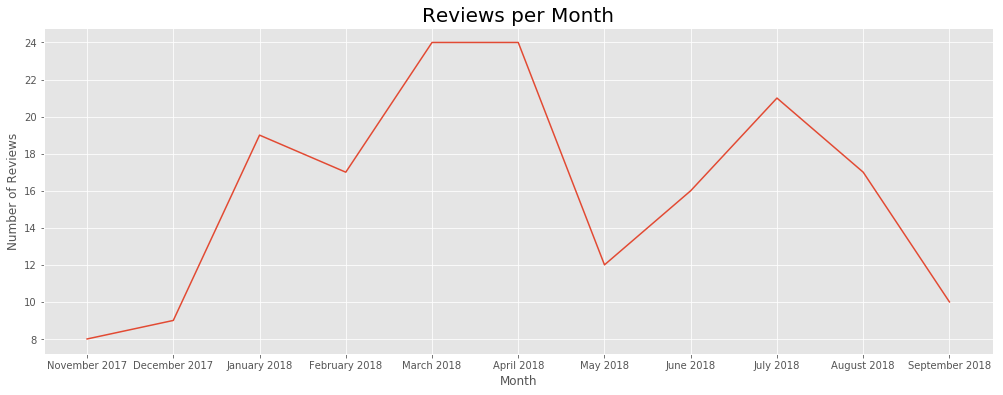

In [29]:
plt.figure(figsize=(17,6))
plt.plot(uk_review.index, uk_review['Number of Reviews'])

plt.ylabel('Number of Reviews')
plt.xlabel('Month')
plt.title('Reviews per Month', fontsize = 20)



Text(0.5,1,'Verified vs. Non-Verified Reviews')

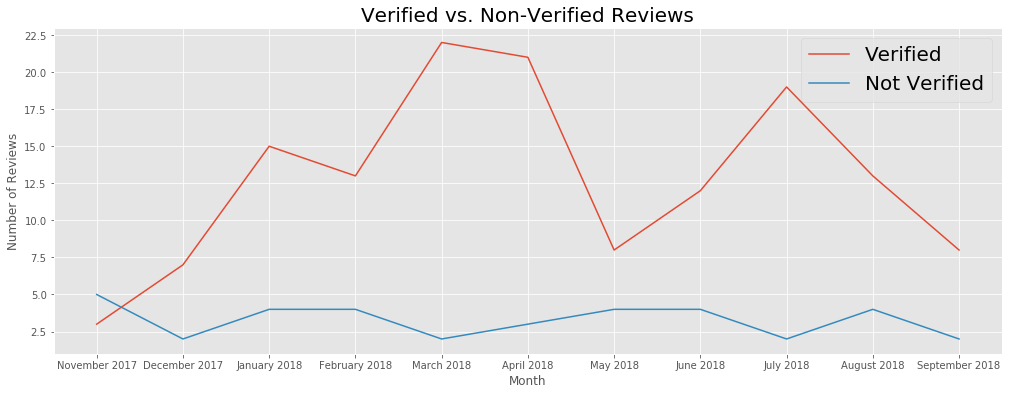

In [30]:
plt.figure(figsize=(17,6))

ver = plt.plot(uk_review.index, uk_review['Number of Verified Purchase Reviews'], label = 'Verified')
not_ver = plt.plot(uk_review.index, uk_review['Number of NOT Verified Purchase Reviews'], label = 'Not Verified')
plt.legend(prop={'size': 20})
plt.ylabel('Number of Reviews')
plt.xlabel('Month')
plt.title('Verified vs. Non-Verified Reviews', fontsize = 20)



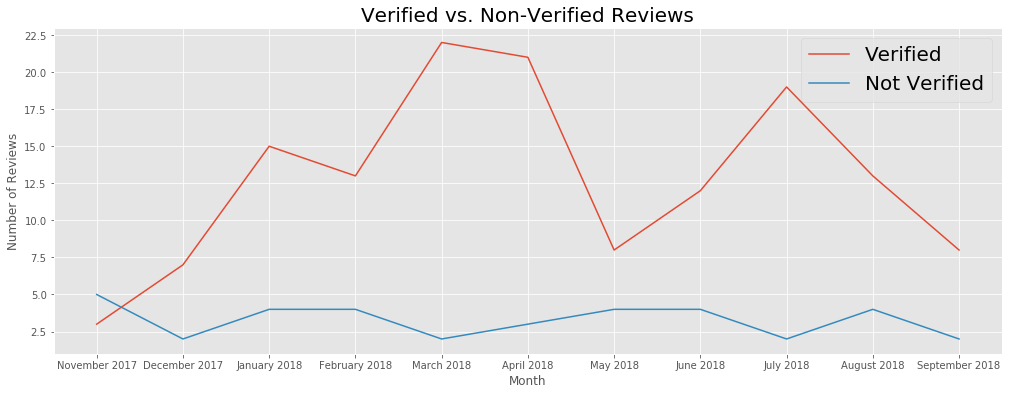

In [31]:
plt.figure(figsize=(17,6))

ver = plt.plot(uk_review.index, uk_review['Number of Verified Purchase Reviews'], label = 'Verified')
not_ver = plt.plot(uk_review.index, uk_review['Number of NOT Verified Purchase Reviews'], label = 'Not Verified')
plt.legend(prop={'size': 20})
plt.ylabel('Number of Reviews')
plt.xlabel('Month')
plt.title('Verified vs. Non-Verified Reviews', fontsize = 20)


hey = uk.groupby('user_type')

Text(0.5,0.98,'Boxplot Average Rating Verified vs. Not Verified')

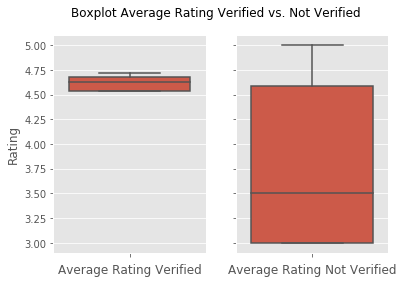

In [32]:
plot_1 = uk_review.iloc[[1 ,2 ,3 ,4 ,5,6 ,7, 8, 9], 4]
plot_2 = uk_review.iloc[:, 5]



f, axes = plt.subplots(1, 2, sharey=True)



sns.boxplot(y=plot_1, ax=axes[0], showfliers=False).set(
                                    xlabel='Average Rating Verified', 
                                    ylabel='Rating'
                                    )

sns.boxplot(y=plot_2, ax=axes[1], showfliers=False).set(
                                    xlabel='Average Rating Not Verified', 
                                    ylabel= ''
                                    )

f.suptitle('Boxplot Average Rating Verified vs. Not Verified')

Text(0.5,1,'Density Curve Nov 17 - Sep 18')

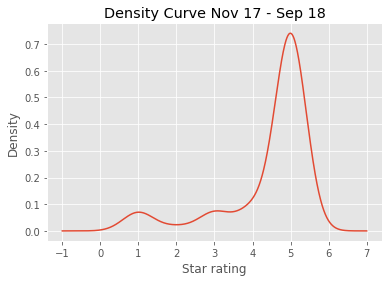

In [34]:
uk_sorted = uk.sort_index()


fig, ax = plt.subplots()


y = uk_sorted['star_rating'].plot.kde()
plt.xlabel('Star rating')
plt.title('Density Curve Nov 17 - Sep 18')




Text(0.5,1,'Density Curve Nov 17')

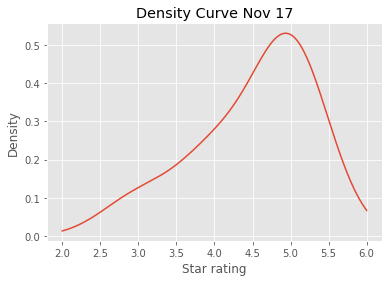

In [54]:
uk_early= uk['2017-11']
uk_early['star_rating'].plot.kde()
plt.xlabel('Star rating')
plt.title('Density Curve Nov 17')

In [55]:
verified = uk_early[uk_early['user_type']=='Verified Purchase']

v_1 = verified[verified['star_rating'] == 1]['star_rating'].count()
v_2 = verified[verified['star_rating'] == 2]['star_rating'].count()
v_3 = verified[verified['star_rating'] == 3]['star_rating'].count()
v_4 = verified[verified['star_rating'] == 4]['star_rating'].count()
v_5 = verified[verified['star_rating'] == 5]['star_rating'].count()

v_sum = pd.Series([v_1, v_2, v_3, v_4, v_5], index = ['1 Star','2 Stars','3 Stars','4 Stars','5 Stars'])
v_ = v_sum.to_frame()
v_ = v_.reset_index()
v_.columns = ['Rating', 'Count']

Text(0.5,1,'Count Verified Ratings November')

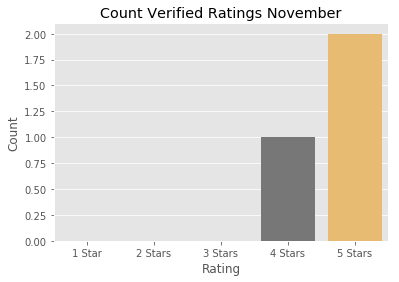

In [56]:
sns.barplot(x="Rating", y="Count", data=v_).set_title('Count Verified Ratings November')

In [57]:
not_verified = uk_early[uk_early['user_type']=='Not Verified Purchase']

nv_1 = not_verified[not_verified['star_rating'] == 1]['star_rating'].count()
nv_2 = not_verified[not_verified['star_rating'] == 2]['star_rating'].count()
nv_3 = not_verified[not_verified['star_rating'] == 3]['star_rating'].count()
nv_4 = not_verified[not_verified['star_rating'] == 4]['star_rating'].count()
nv_5 = not_verified[not_verified['star_rating'] == 5]['star_rating'].count()

nv_sum = pd.Series([nv_1, nv_2, nv_3, nv_4, nv_5], index = ['1 Star','2 Stars','3 Stars','4 Stars','5 Stars'])
nv_ = nv_sum.to_frame()
nv_ = nv_.reset_index()
nv_.columns = ['Rating', 'Count']

Text(0.5,1,'Count Not Verified Ratings November')

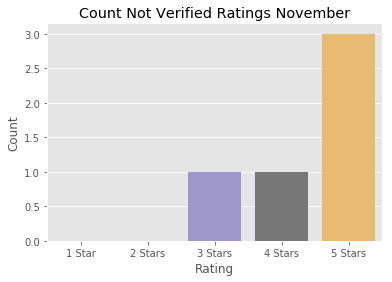

In [58]:
sns.barplot(x="Rating", y="Count", data=nv_).set_title('Count Not Verified Ratings November')

In [42]:
ver_interaction_index = uk_review['Number of Helpful Votes Verified Reviews']/uk_review['Number of Verified Purchase Reviews']


nver_interaction_index = uk_review['Number of Helpful Votes NOT Verified Reviews']/uk_review['Number of NOT Verified Purchase Reviews']

ver_interaction_index = ver_interaction_index.to_frame().interpolate(method="linear")
nver_interaction_index = nver_interaction_index.to_frame()

Text(0.5,1,'Interaction Index: Upvotes divided by Number of Reviews')

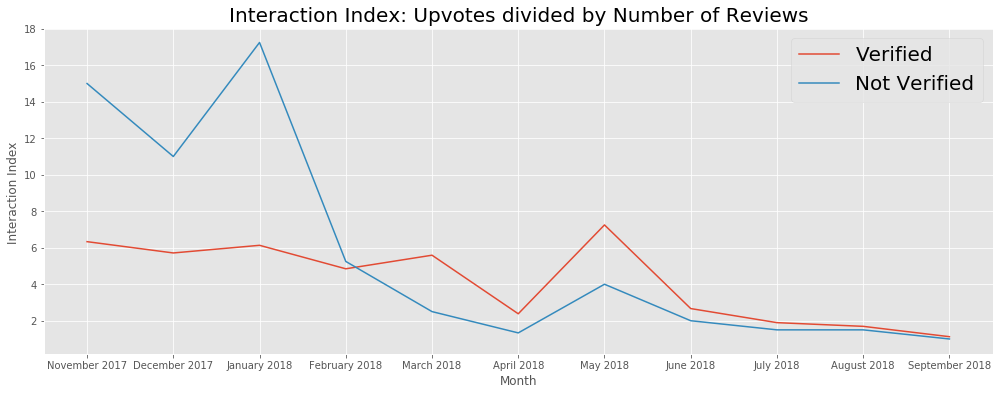

In [43]:
plt.figure(figsize=(17,6))

ver = plt.plot(ver_interaction_index, label = 'Verified')
not_ver = plt.plot(nver_interaction_index, label = 'Not Verified')
plt.legend(prop={'size': 20})
plt.ylabel('Interaction Index ')
plt.xlabel('Month')
plt.title('Interaction Index: Upvotes divided by Number of Reviews', fontsize = 20)





In [44]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [45]:
apple_mask = np.array(Image.open("apple_logo.png"))
ver_reviewtext = uk.loc[uk['user_type'] == 'Verified Purchase']['2017']['review_text'].str.cat(sep=" ")
apple_mask
ver_reviewtext

"Good but crashing within 2 days after installing sim...don’t know what to do? Bought this for my daughter and she absolutely loves it! It's an early Christmas present to replace a smashed iPhone 6 and the iPhone 8 has some useful new features. The gold colour looks pretty good too! fast delivery phone new and as it should be very happy thanks This i'dis the 3rd request in 20 minutes no no more harrasment One of the best purchases I've made in my life. So happy I did not go for the X Fast shipmentAll goodWould buy front the seller again Quick delivery.  The produt is as described. Having used this phone now for almost 2 months I can say it's superb.  The only downside appears to be the speed at which the battery loses its power.  Also if purchasing the excellent Caseology iphone case, be sure not to accidentally push down the mute button on the side.  Basically, this is no longer a phone, it is a miniature computer/ipad.  The 'Touch ID' facility is amazing and allows me to access my Na

In [1]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

stop.extend(['iPhone', 'IPhone', 'Phone', 'phone', 'apple', 'Apple', 'new', 'release', 'within', 'days'])

wc = WordCloud(stopwords = stop, background_color="white", max_words=1000, mask=apple_mask, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(ver_reviewtext)

# store to file
wc.to_file("apple_vuk.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'WordCloud' is not defined